## 回帰

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

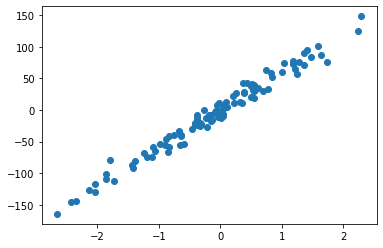

In [9]:
X_gen, y_gen = datasets.make_regression(n_samples=100, n_features=1, noise=10, random_state=2)
plt.scatter(X_gen, y_gen)
plt.show()

In [10]:
X = torch.from_numpy(X_gen.astype(np.float32))
y = torch.from_numpy(y_gen.astype(np.float32))

In [11]:
y = y.view(-1, 1)

In [12]:
n_samples, n_feature = X.shape

In [13]:
model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [14]:
epochs = 1000
loss_list = []

for epoch in range(epochs):

    y_pred = model(X)
    loss = criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_list.append(loss.item())
    if(epoch + 1) % 100 == 0:
        print(f'epoch: {epoch+1}, loss={loss.item():.4f}')

epoch: 100, loss=138.5390
epoch: 200, loss=88.0972
epoch: 300, loss=87.2918
epoch: 400, loss=87.2765
epoch: 500, loss=87.2761
epoch: 600, loss=87.2761
epoch: 700, loss=87.2761
epoch: 800, loss=87.2761
epoch: 900, loss=87.2761
epoch: 1000, loss=87.2761


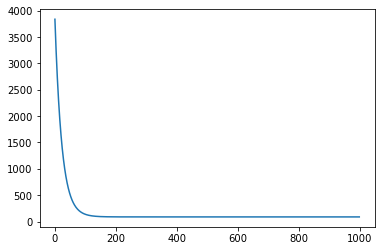

In [15]:
plt.plot(loss_list)

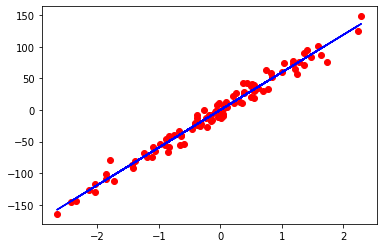

In [16]:
with torch.no_grad():
    predicted_y = model(X).detach().numpy()

    plt.plot(X_gen, y_gen, 'ro')
    plt.plot(X_gen, predicted_y, 'b')
    plt.show()

## ロジスティック回帰

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

In [18]:
data = datasets.load_breast_cancer()
df_X = pd.DataFrame(data.data, columns=data.feature_names)
df_X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [19]:
df_y = pd.DataFrame(data.target, columns=['target'])
df_y

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [20]:
data = datasets.load_breast_cancer()

In [21]:
X, y = data.data, data.target

In [30]:
n_samples, n_features = X.shape
X.shape

(569, 30)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [24]:
sc = StandardScaler()

In [25]:
X_train =  sc.fit_transform(X_train)

In [26]:
X_test = sc.transform(X_test)

In [27]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [28]:
y_train = y_train.view(-1, 1)
y_test = y_test.view(-1, 1)

In [29]:
class Model(nn.Module):
    def __init__(self, in_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(in_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

In [31]:
model = Model(n_features)

In [32]:
epochs = 1000
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_list = []

In [33]:
for epoch in range(epochs):

    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_list.append(loss.item())

    if(epoch+1) % 100 == 0:
        print(f'epoch: {epoch+1}, loss={loss.item():.4f}')

epoch: 100, loss=0.2617
epoch: 200, loss=0.1901
epoch: 300, loss=0.1588
epoch: 400, loss=0.1407
epoch: 500, loss=0.1286
epoch: 600, loss=0.1200
epoch: 700, loss=0.1133
epoch: 800, loss=0.1081
epoch: 900, loss=0.1038
epoch: 1000, loss=0.1002


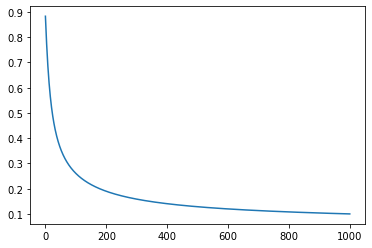

In [34]:
plt.plot(loss_list)

In [41]:
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_0_1 = y_predicted.round()
    acc = y_predicted_0_1.eq(y_test).sum() / float(y_test.shape[0])
    print(round(acc.item(), 3))

0.991


In [39]:
y_predicted_0_1

tensor([[1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
      